<a href="https://colab.research.google.com/github/chavi55/AI/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC_%EB%B0%B0%ED%8F%AC%EC%9A%A9_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터 전처리(Preprocessing)

* 데이터 클린징
* 결손값 처리(Null/Nan 처리)
* 데이터 인코딩(레이블, 원-핫 인코딩)
* 데이터 스케일링(정규화,  표준화)
* 이상치 제거
* Feature 선택, 추출 및 가공


### 데이터 인코딩

머신러닝 알고리즘은 문자열 데이터 속성을 입력 받지 않으며 모든 데이터는 숫자형으로 표현되어야 함
문자형 카테고리 속성은 모두 숫자값으로 변환/인코딩 되어야함

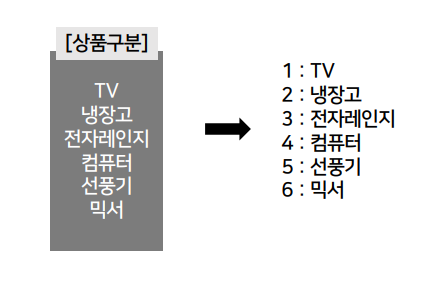

* 레이블 인코딩(Label encoding)

In [ ]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
encoder = LabelEncoder()
encoder.fit(items) #fit()은 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

In [ ]:
print('인코딩 클래스:',encoder.classes_)

In [ ]:
print('디코딩 원본 값:',encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

* 원-핫 인코딩(One-Hot encoding)

원-핫 인코딩은 피처값의 유형에 따라 새로운 피처를 추가해 고유값에 해당하는 칼럼에만 1을 표시하고 나머지 컬럼에는 0을 표시하는 방식

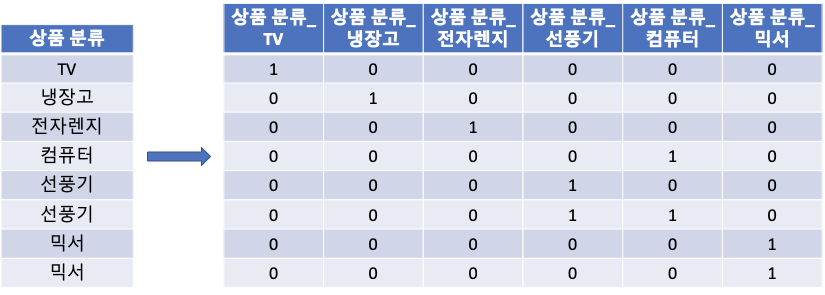

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환합니다. 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 2차원 데이터로 변환합니다. 
labels = labels.reshape(-1,1)

# 원-핫 인코딩을 적용합니다. 
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

In [ ]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서'] })
df

In [ ]:
pd.get_dummies(df)

### 피처 스케일링과 정규화

* StandardScaler

데이터의 피처 각각이 평균이 0, 분산이 1인 가우시안 정규분포를 가진 값으로 변환하는 작업을 표준화라고 한다. 기계학습 시에 SVM, 선형 회귀, 로지스틱 회귀는 가우시안 분포를 가정하고 구현되었으므로 전처리 단계에서 표준화를 해주는 것이 성능 향상에 도움이 된다.

원래 값에서 피처의 평균을 뺀 값을 피처의 표준편차로 나눠서 표준화한다. 수식으로 나타내면 다음과 같다.

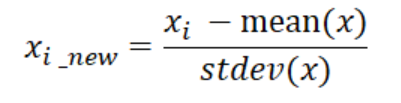

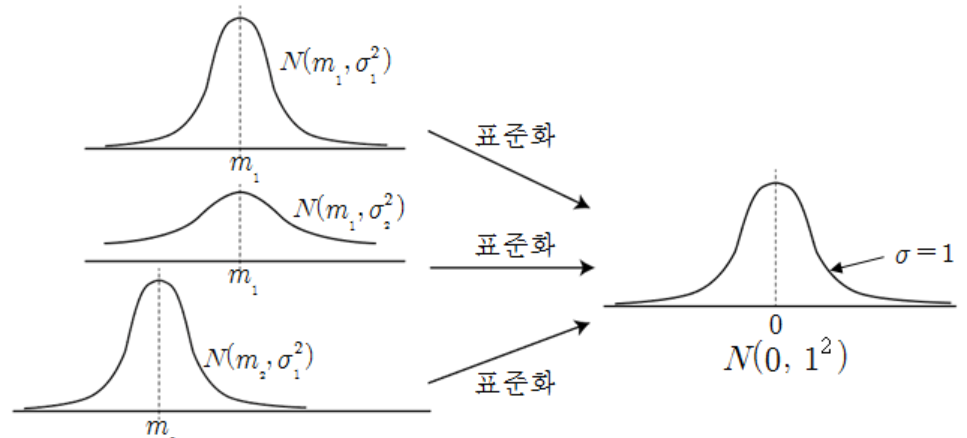

사이킷런의 StandardScaler를 사용해 표준화를 진행해보자. 데이터 인코딩에서와 마찬가지로 피처 스케일링에서도 fit()과 transform()을 사용한다.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다. 
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

* MinMaxScaler

서로 다른 피처의 크기를 통일하기 위해 크기를 0 ~ 1의 똑같은 단위로 변환해주는 것을 정규화라고 한다. 원래 값에서 피처의 최솟값을 뺀 값을 피처의 최댓값과 최솟값의 차이로 나누어 정규화할 수 있다. 수식으로 나타내면 다음과 같다.

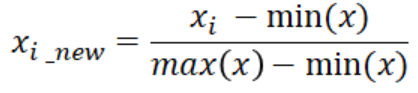

사이킷런에서 제공하는 MinMaxScaler는 음수 값이 없으면 0 ~ 1의 값으로, 음수 값이 있으면 -1 ~ 1의 값으로 변환해준다.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled.max())
